# Plotting hydrograph data

### Background
A hydrograph is a graph showing the rate of flow (discharge) versus time past a specific point in a river, channel, or conduit carrying flow. 

You have been given some real hydrograph data (`Hydrograph_1.csv`) from a catchment area in North America.

### Task
Your task is to read, process (as required) and plot the data. You should create an overplot of the entire timeseries, and (for more ambitious/advanced) sub-plots for each individual year. 

You may use any of the builtin Python libraries, as well as numpy, pandas, and matplotlib if required.

This task is formative and will help you gain experience and build confidence in your coding in preparation for the summative coursework assessment. If you would like feedback on this task then please submit your Jupyter notebook file to the dropbox on the module Blackboard site.

Some hints and guidance have been provided in the rest of this notebook that you may use to help you plan and structure how you will approach the problem.

### Code (and hints)
What modules do you need? Import them first.

In [27]:
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading the file
Think about how you will read in the file
- What type of data does it contain? 
- How can you have a look at the first few lines of code to see? 
- Would it be better to read in the data into a Python structure, i.e. a list, or use a numpy array?
- Do you want to do any processing to the data as you read it in?

In [32]:
filename = 'Hydrograph_1.csv'
file = open('./data/' + filename)
lines = []
for line in file:
    line.strip()
    lines.append(line)
file.close()

#### Processing/cleaning the data
Once you have read the data from file into a variable you probably need to do some further processing to extract date/time information and flow rate. 
- Dealing with strings in Python? Have a look at the string library for lots of builtin functions that may help you cleaning/processing strings, e.g. `.strip()`, `.split()`, `.replace()`
- Can you use the Python `datetime` library to help you extract and store the date/time in a suitable way for later plotting?

In [34]:
dates = []
flows = []

for line in lines[2::]:
    # Get date and time date and construct datetime object
    comma_split = line.split(',')
    date_str = comma_split[0].split('\t')[1]
    time_str = comma_split[1].split('\t')[0].strip()
    # Catch 24:00 case
    if time_str.startswith('24'):
        time_str = time_str.replace('24', '00')
        date_time_obj = datetime.datetime.strptime(date_str + time_str, '%d %b %Y%H:%M')
        date_time_obj += datetime.timedelta(days=1)
    else:
        date_time_obj = datetime.datetime.strptime(date_str + time_str, '%d %b %Y%H:%M')

    # Get flow rate
    flow = comma_split[1].split('\t')[1].strip()
    if flow:
        flow = float(flow)
    else:
        flow = 0.0 

    dates.append(date_time_obj)
    flows.append(flow)

#### Plotting
You should create an overall plot of the timeseries and subplots for each individual year.
- Think about creating nicely formatted and labelled plots, i.e. axis labels, grid lines, colours, legends
- Can you export your plots to PDF?

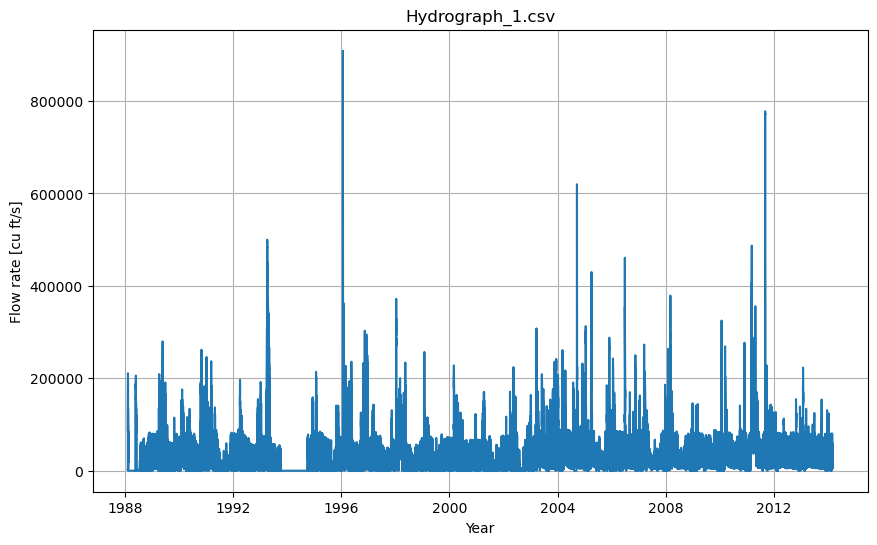

In [35]:
# Plot single plot of all data
plt.figure(figsize=(10,6))
plt.plot(dates, flows)
plt.xlabel('Year')
plt.ylabel('Flow rate [cu ft/s]')
plt.title(filename)
plt.grid(True)
# plt.savefig(filename[:-4] + '.pdf')
plt.show()

# Calculate min and max year
min_year = min(dates)
min_year = int(min_year.year)
max_year = max(dates)
max_year = int(max_year.year)